In [30]:
dat = read.csv('crime_v2.csv')
library('ggplot2')
library('effsize')
library('dplyr')
library('RColorBrewer')
library('corrplot')
library('cowplot')
#library('stargazer')
options(repr.plot.width=5, repr.plot.height=3)

## Crime Rate EDA

[1] 96

[1] "numeric"

[1] "Crimes committed per person"

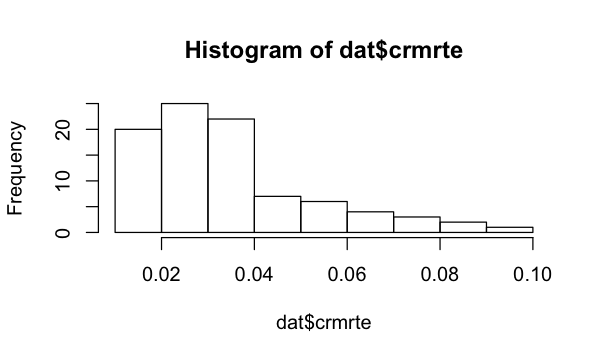

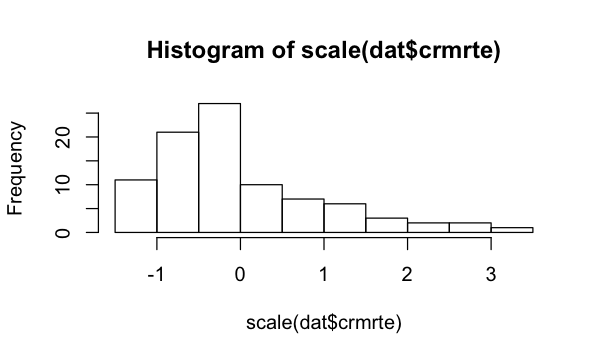

In [60]:
nrow(dat)
class(dat$crmrte)
hist(dat$crmrte)
"Crimes committed per person"
hist(scale(dat$crmrte))

## Probablity of arrest

[1] "numeric"

[1] "Crimes committed per person"

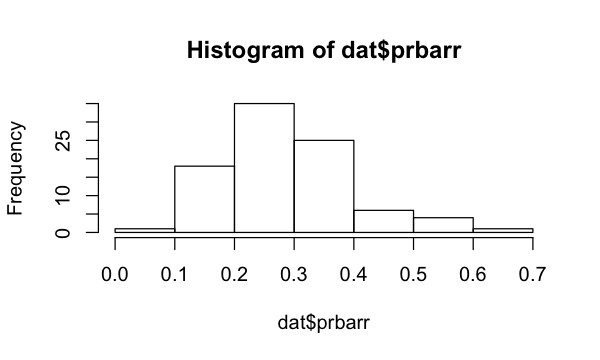

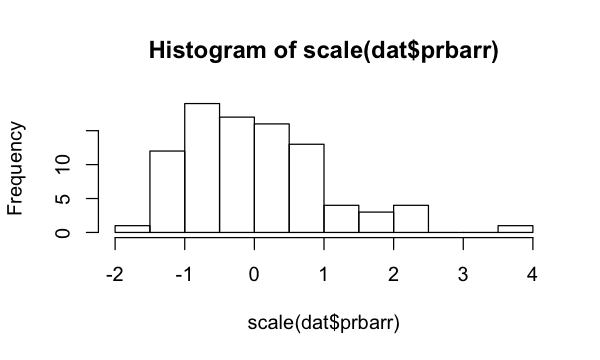

In [61]:
class(dat$prbarr)
hist(dat$prbarr)
"Crimes committed per person"
hist(scale(dat$prbarr))

In [32]:
dat[dat$prbarr > .8,]
nrow(dat)
# What to do about impossible value?  remove entire row?
dat <- dat[dat$prbarr < 1,]
nrow(dat)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,⋯,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 97

[1] 96

In [40]:
dat$prbconv <- as.numeric(dat$prbconv)  #listed as factor originally
x <-cor(dat, use = "complete.obs")
x <- x['prbarr',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbarr        mix     crmrte    density       wmfg       wfed       wloc 
1.00000000 0.55439697 0.38127124 0.32640487 0.30212659 0.26394951 0.26035199 
      wfir      urban    prbconv       wtuc    pctymle   pctmin80       wcon 
0.25214191 0.23818098 0.23347346 0.19134127 0.18850622 0.18535636 0.18100986 
      wsta       wser    central       wtrd      polpc      taxpc     avgsen 
0.17189426 0.15479964 0.14815307 0.14370493 0.12418109 0.10924775 0.10242191 
      west     county    prbpris 
0.07109032 0.04345528 0.03475570

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

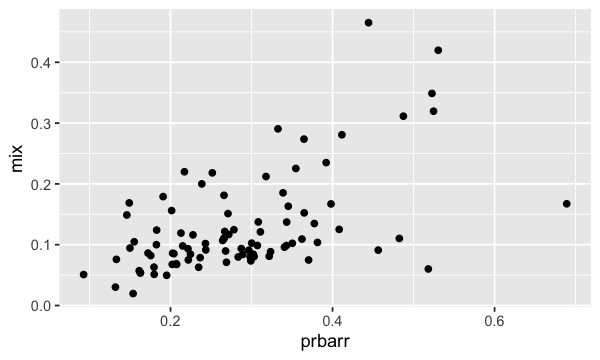

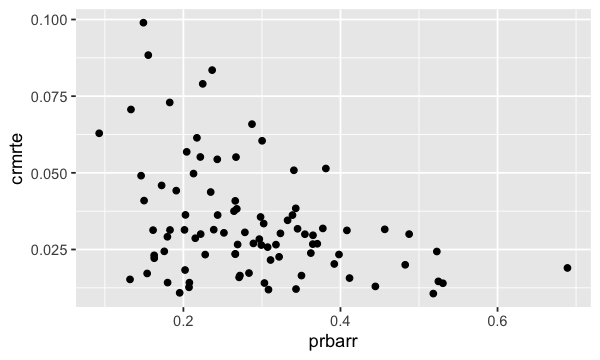

In [36]:
scatterp <- function(x, ylist){
    for (i in range(ylist)) {
        plot <- ggplot(dat, aes(x, i)) + geom_point()
        print(i)
        print(plot)
    }
}
#scatterp(dat$prbarr,c(dat$crmrte,dat$polpc))
ggplot(dat, aes(prbarr, mix)) + geom_point()
ggplot(dat, aes(prbarr, crmrte)) + geom_point()



Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

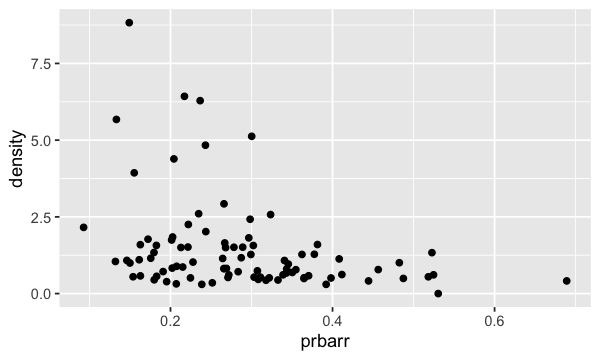

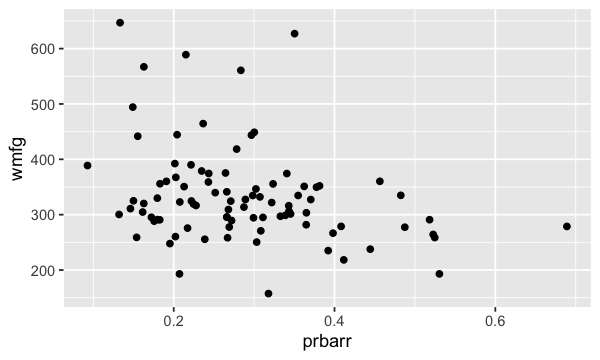

In [35]:
ggplot(dat, aes(prbarr, density)) + geom_point()
ggplot(dat, aes(prbarr, wmfg)) + geom_point()

## Probability of conviction

[1] "numeric"

[1] 63 89 13 62 52  3 59 78 42 86 23 37 38 27 58 20 33 82 48 47 77 30 12  4  7
[26] 75 73 55 50  5 11 76 10 64 17  6 49 66 65 34 71 69 72 87 68 32 29 79 61  8
[51] 80 26  9 43 88 35 56 14 53 84 15 40 18 24 41 83 28 60 67 45 54 57 36 51 19
[76] 74 81 21 39 22 25 31 92 44 16 46 70 70 91 85 NA NA NA NA NA NA

[1] "Conviction rate"

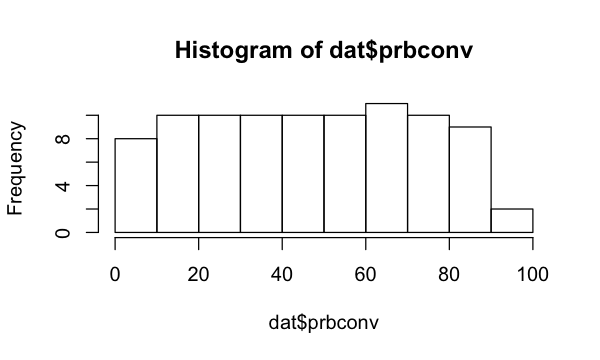

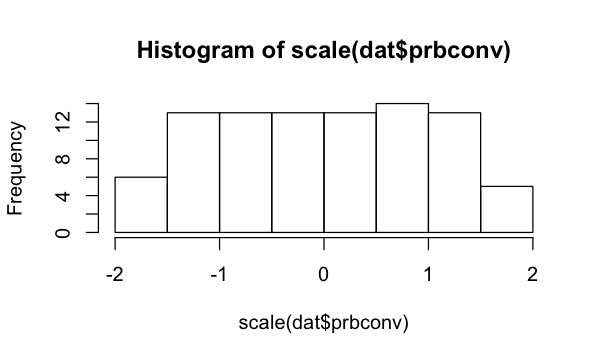

In [38]:
class(dat$prbconv)
dat$prbconv
dat$prbconv <- as.numeric(dat$prbconv)  #listed as factor originally
hist(dat$prbconv)
"Conviction rate"
hist(scale(dat$prbconv))

In [41]:
x <-cor(dat, use = "complete.obs")
x <- x['prbconv',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbconv     crmrte        mix    density      urban      polpc      taxpc 
1.00000000 0.38159995 0.33110802 0.28798516 0.27988463 0.27024590 0.27006672 
    prbarr    pctymle       wser       wtrd   pctmin80       wsta     county 
0.23347346 0.22129066 0.17537877 0.13590190 0.11724183 0.10791240 0.07259169 
      wcon       wfir     avgsen    central       wmfg       wfed    prbpris 
0.05445264 0.04432860 0.04377468 0.03963446 0.03917207 0.01925566 0.01786566 
      west       wtuc       wloc 
0.01620872 0.01547152 0.01368428

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

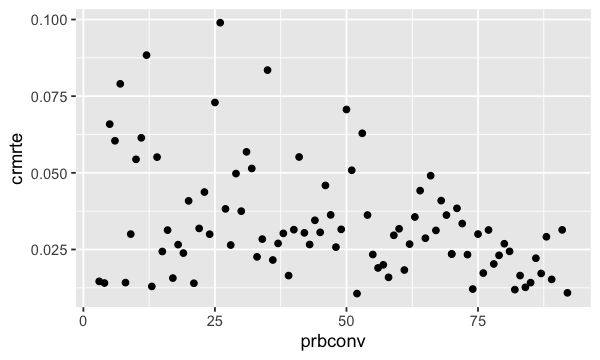

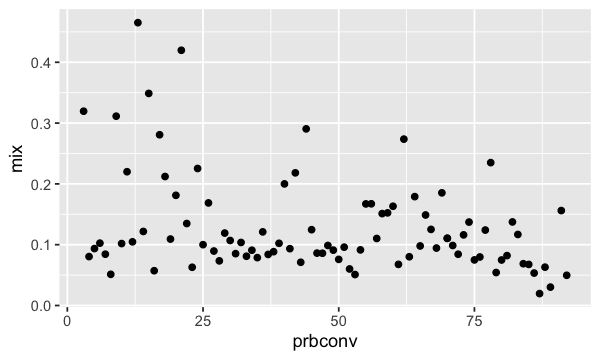

In [42]:
ggplot(dat, aes(prbconv, crmrte)) + geom_point()
ggplot(dat, aes(prbconv, mix)) + geom_point()

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

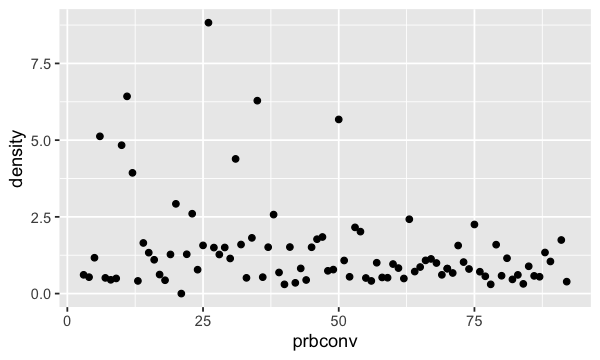

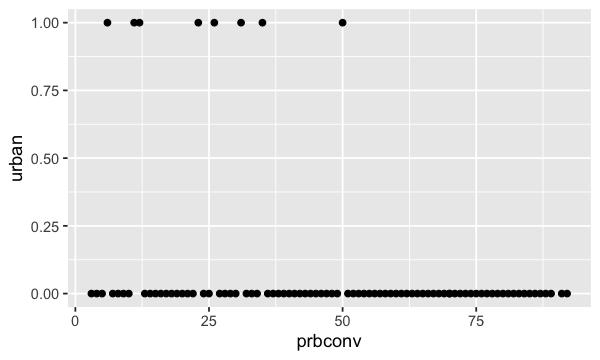

In [43]:
ggplot(dat, aes(prbconv, density)) + geom_point()
ggplot(dat, aes(prbconv, urban)) + geom_point()

## Probability of Prison

[1] "numeric"

[1] "Probability of Prison "

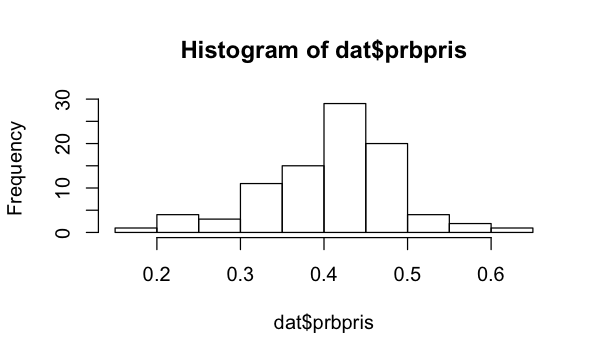

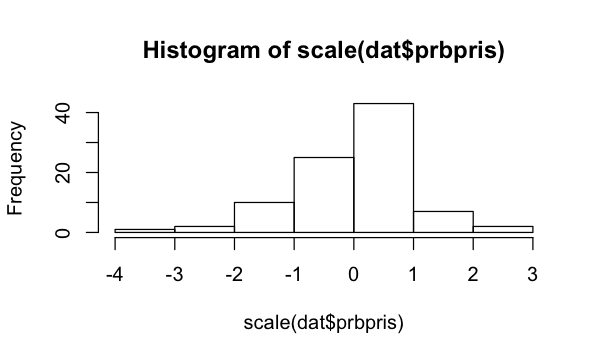

In [45]:
class(dat$prbpris)
hist(dat$prbpris)
"Probability of Prison "
hist(scale(dat$prbpris))

In [46]:
x <-cor(dat, use = "complete.obs")
x <- x['prbpris',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbpris     central      avgsen        wtrd    pctmin80         mix 
1.000000000 0.173973012 0.159759067 0.138910283 0.123330673 0.121502781 
       wtuc        wfed     density       taxpc     pctymle      county 
0.112595914 0.086368982 0.085996777 0.084802384 0.077682941 0.076106862 
      polpc      crmrte        west       urban        wloc        wser 
0.075306665 0.066782246 0.063707025 0.054036104 0.052590798 0.040303647 
       wcon      prbarr        wfir        wsta     prbconv        wmfg 
0.039152570 0.034755696 0.029575428 0.027228519 0.017865662 0.007581677

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

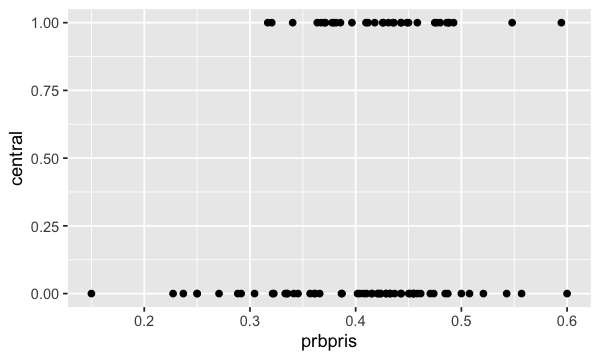

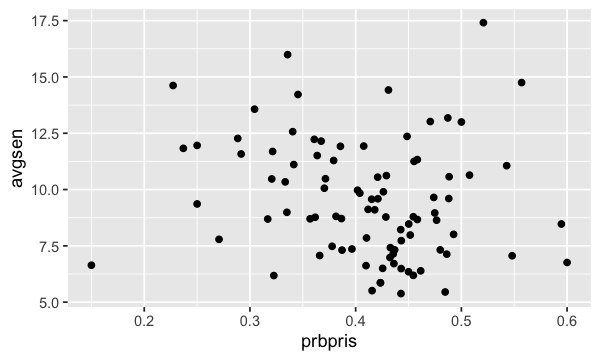

In [47]:
ggplot(dat, aes(prbpris, central)) + geom_point()
ggplot(dat, aes(prbpris, avgsen)) + geom_point()

## Average prison sentence in days

[1] "numeric"

[1] "Average sentence in days"

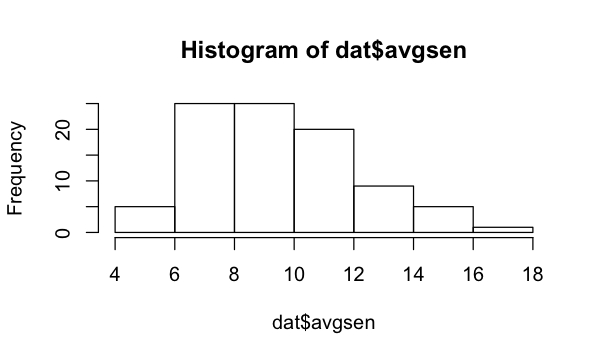

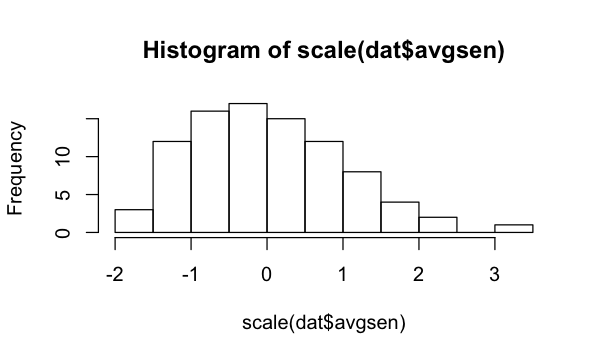

In [48]:
class(dat$avgsen)
hist(dat$avgsen)
"Average sentence in days"
hist(scale(dat$avgsen))

In [49]:
x <-cor(dat, use = "complete.obs")
x <- x['avgsen',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

avgsen        polpc         wtuc        urban         wsta         wfir 
1.0000000000 0.2959305749 0.1801614623 0.1761762136 0.1659626168 0.1615687463 
     prbpris         wfed         wser        taxpc          mix      central 
0.1597590674 0.1589756913 0.1586495767 0.1422287135 0.1333087148 0.1222946217 
     density      pctymle       prbarr       crmrte     pctmin80         wtrd 
0.1192868210 0.1047377058 0.1024219081 0.1022436059 0.0934615040 0.0801960060 
        wmfg         wcon      prbconv         wloc         west       county 
0.0664454211 0.0495134300 0.0437746787 0.0119111195 0.0095857422 0.0008751455

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

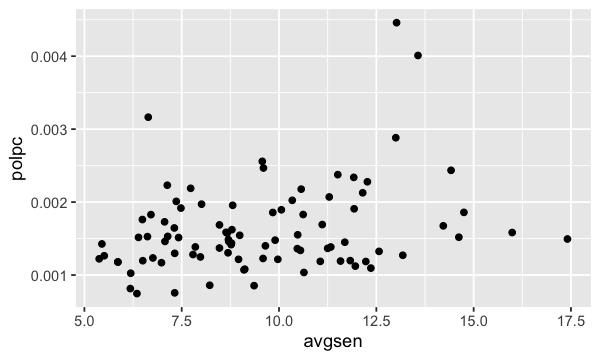

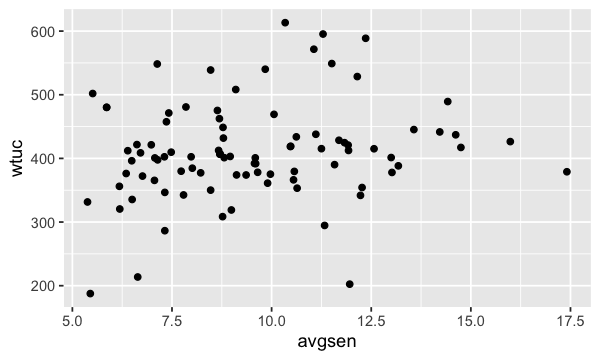

In [50]:
ggplot(dat, aes(avgsen, polpc)) + geom_point()
ggplot(dat, aes(avgsen, wtuc)) + geom_point()

## Police per capita

[1] "numeric"

[1] "Police per capita"

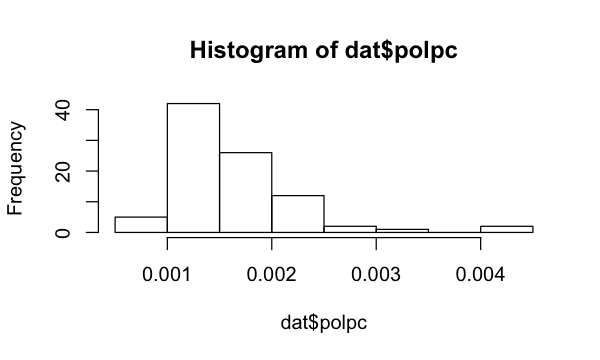

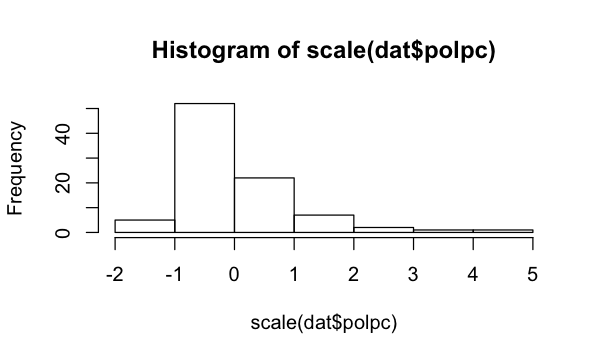

In [51]:
class(dat$polpc)
hist(dat$polpc)
"Police per capita"
hist(scale(dat$polpc))

In [52]:
x <-cor(dat, use = "complete.obs")
x <- x['polpc',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

polpc       taxpc      crmrte     density       urban      avgsen 
1.000000000 0.566832758 0.484894133 0.357452492 0.301722169 0.295930575 
       wmfg     prbconv        wloc        wfed        wfir        wcon 
0.271253835 0.270245901 0.267071229 0.260574195 0.257432617 0.197483460 
       wtrd     pctymle        wsta      prbarr        wtuc         mix 
0.158580898 0.151096133 0.138242934 0.124181090 0.110505188 0.089834340 
     county     prbpris    pctmin80     central        west        wser 
0.078538915 0.075306665 0.068689165 0.037720837 0.007687079 0.007544371

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

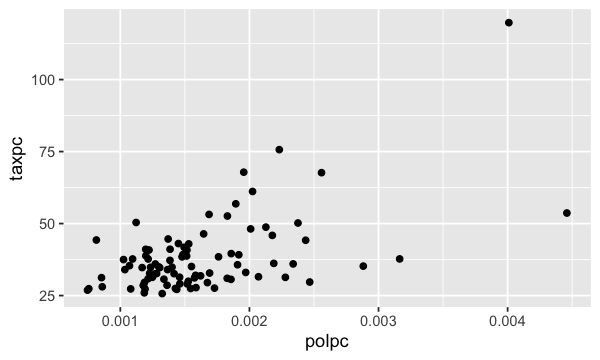

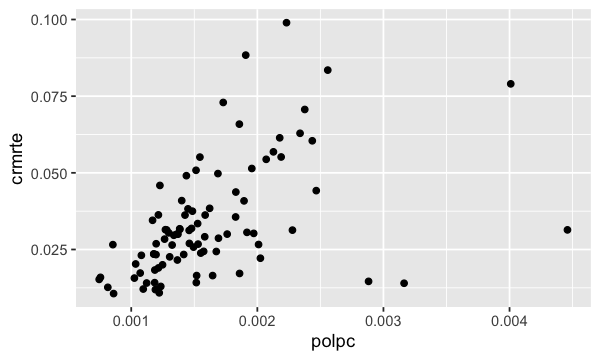

In [53]:
ggplot(dat, aes(polpc, taxpc)) + geom_point()
ggplot(dat, aes(polpc, crmrte)) + geom_point()

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

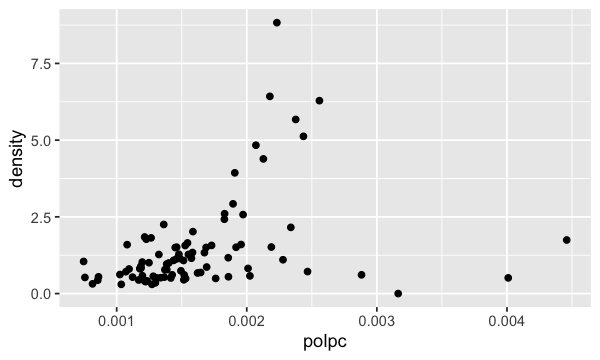

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,55,87,0.0790163,0.224628,7,0.304348,13.57,0.00400962,0.5115089,119.76145,⋯,445.2762,189.7436,284.5933,221.3903,319.21,338.91,361.68,326.08,0.08437271,0.07613807
90,195,87,0.0313973,0.201397,91,0.470588,13.02,0.00445923,1.7459893,53.66693,⋯,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


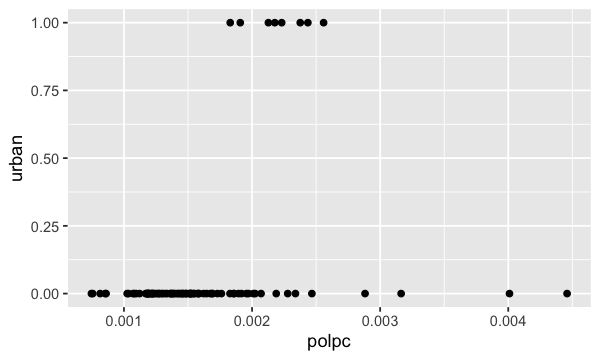

In [55]:
ggplot(dat, aes(polpc, density)) + geom_point()
ggplot(dat, aes(polpc, urban)) + geom_point()
dat[dat$polpc > .0035,]

## Mix of crimes

[1] "numeric"

[1] "Types of crime, ratio of face to face vs other"

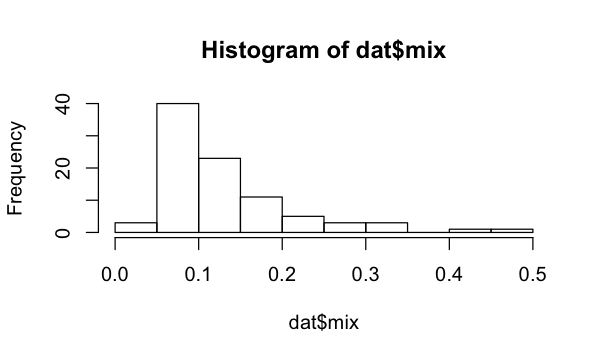

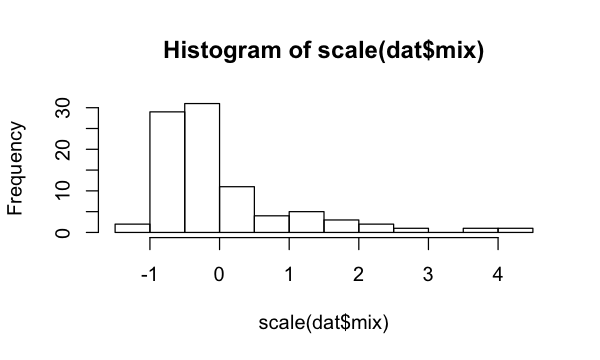

In [56]:
class(dat$mix)
hist(dat$mix)
"Types of crime, ratio of face to face vs other"
hist(scale(dat$mix))

In [57]:
x <-cor(dat, use = "complete.obs")
x <- x['mix',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

mix      prbarr        wmfg     prbconv        wfed        wloc 
1.000000000 0.554396972 0.340768463 0.331108023 0.313144183 0.254003029 
       wtuc        wfir        wcon    pctmin80        wser     density 
0.251972035 0.212337395 0.206201484 0.199341881 0.174484919 0.138911963 
     crmrte      avgsen        wtrd     prbpris     pctymle     central 
0.138140739 0.133308715 0.127383192 0.121502781 0.094317186 0.093266711 
      polpc        wsta       urban      county       taxpc        west 
0.089834340 0.076166476 0.064647844 0.063273443 0.044748337 0.005320382

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

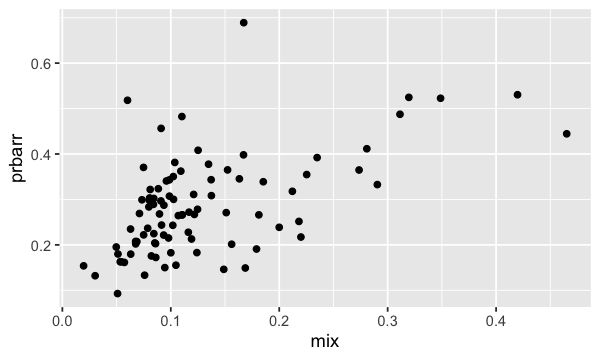

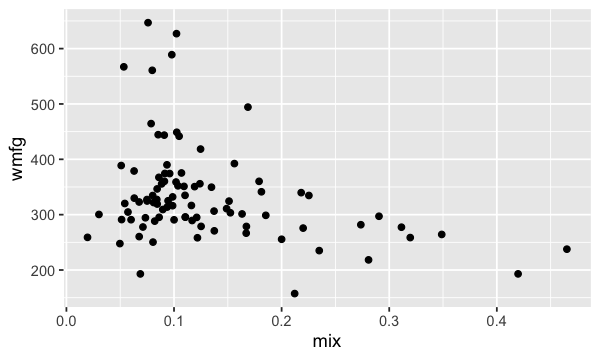

In [58]:
ggplot(dat, aes(mix, prbarr)) + geom_point()
ggplot(dat, aes(mix, wmfg)) + geom_point()

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

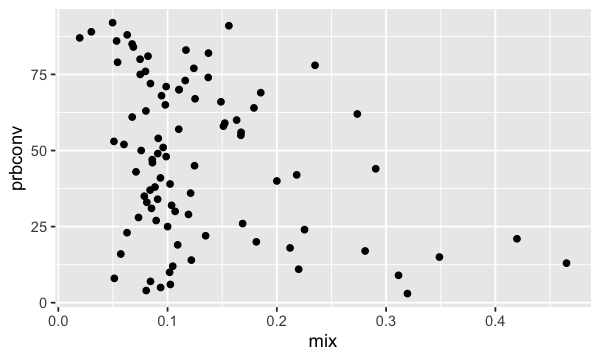

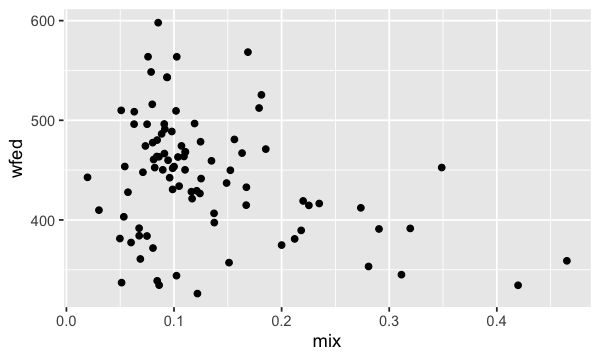

In [59]:
ggplot(dat, aes(mix, prbconv)) + geom_point()
ggplot(dat, aes(mix, wfed)) + geom_point()

In [11]:
head(dat)
nrow(dat)
#cor(dat, use = "complete.obs")
dat$prbconv <- as.numeric(dat$prbconv)
x <- cor(dat, use = "complete.obs")

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87,0.0356036,0.298270,63,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,89,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,13,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,62,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,52,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,3,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


[1] 96

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

In [12]:
x

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
county,1.0000000000,NA,0.01529315,-0.04345528,0.07259169,-0.076106862,0.0008751455,0.078538915,-0.02986308,-0.07367391,⋯,0.02740696,0.0127744262,0.03766286,0.140034241,-0.051743898,-0.008632031,0.1078392554,0.074114090,-0.063273443,0.097251445
year,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
crmrte,0.0152931453,NA,1.00000000,-0.38127124,-0.38159995,0.066782246,0.1022436059,0.484894133,0.72845664,0.44536110,⋯,0.25422334,0.4182521290,0.34039461,-0.055716401,0.383959905,0.492064722,0.1980060646,0.412634725,-0.138140739,0.287038473
prbarr,-0.0434552768,NA,-0.38127124,1.00000000,-0.23347346,-0.034755696,-0.1024219081,-0.124181090,-0.32640487,-0.10924775,⋯,-0.19134127,-0.1437049320,-0.25214191,-0.154799638,-0.302126589,-0.263949512,-0.1718942614,-0.260351986,0.554396972,-0.188506218
prbconv,0.0725916896,NA,-0.38159995,-0.23347346,1.00000000,0.017865662,-0.0437746787,-0.270245901,-0.28798516,-0.27006672,⋯,-0.01547152,-0.1359018998,0.04432860,0.175378774,0.039172069,0.019255660,-0.1079124049,-0.013684279,-0.331108023,-0.221290655
prbpris,-0.0761068622,NA,0.06678225,-0.03475570,0.01786566,1.000000000,-0.1597590674,-0.075306665,0.08599678,-0.08480238,⋯,0.11259591,0.1389102829,0.02957543,0.040303647,-0.007581677,0.086368982,-0.0272285191,0.052590798,0.121502781,-0.077682941
avgsen,0.0008751455,NA,0.10224361,-0.10242191,-0.04377468,-0.159759067,1.0000000000,0.295930575,0.11928682,0.14222871,⋯,0.18016146,0.0801960060,0.16156875,-0.158649577,0.066445421,0.158975691,0.1659626168,0.011911119,-0.133308715,0.104737706
polpc,0.0785389152,NA,0.48489413,-0.12418109,-0.27024590,-0.075306665,0.2959305749,1.000000000,0.35745249,0.56683276,⋯,0.11050519,0.1585808976,0.25743262,-0.007544371,0.271253835,0.260574195,0.1382429344,0.267071229,0.089834340,0.151096133
density,-0.0298630846,NA,0.72845664,-0.32640487,-0.28798516,0.085996777,0.1192868210,0.357452492,1.00000000,0.31820397,⋯,0.34152920,0.5805267851,0.54549684,0.042389650,0.456067519,0.587263413,0.2201596208,0.489712633,-0.138911963,0.112876622
taxpc,-0.0736739132,NA,0.44536110,-0.10924775,-0.27006672,-0.084802384,0.1422287135,0.566832758,0.31820397,1.00000000,⋯,0.17473352,0.1689384593,0.12727142,0.073905636,0.275583432,0.058429811,-0.0346180742,0.238785123,-0.044748337,-0.093788926


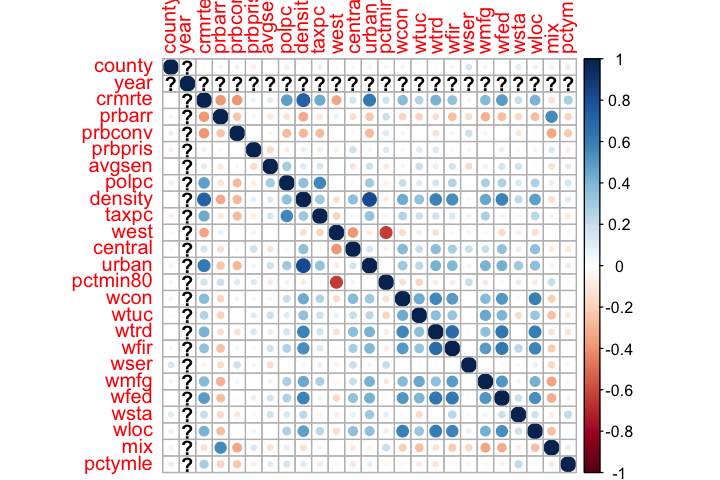

In [13]:
corrplot(x, method="circle")